# 17. 앙상블 모델
- 여러 예측을 집계하여 하나의 예측을 만드는 앙상블 모델은 고성능의 최종 모델을 생성할 수 있음
- 앙상블 모델을 만드는 데 가장 널리 사용되는 방법은 배깅 ( Breiman 1996a ) , 랜덤 포레스트 ( Ho 1995 ; Breiman 2001a ) 및 부스팅 ( Freund and Schapire 1997 )
- 이러한 각 방법은 동일한 유형의 모델(예: 분류 트리)의 여러 버전에서 얻은 예측을 결합
- 그러나 앙상블을 생성하는 가장 초기 방법 중 하나는 모델 스택킹 (Model Stacking)
- 모델 스택킹은 모든 유형의 여러 모델에 대한 예측을 결합
    - 예) 로지스틱 회귀, 분류 트리 및 SVM이 스태킹 앙상블에 포함될 수 있음

In [3]:
library(tidymodels)
library(rules)
library(baguette)
library(stacks)
library(patchwork)
library(kableExtra)

In [4]:
load("concrete_results.RData")

<br>

### 스택 앙상블 구축 과정
1. 훈련 데이터에 대한 예측값을 결합
2. 예측을 혼합하는 모델 구축
3. 앙상블의 각 모델에 대해 원래 훈련 데이터를 적합

<br>

## 17.01. 스택킹을 위한 훈련 데이터
* **앙상블 모델을 구축하는 첫 단계는, 여러 분할을 사용한 리샘플링 방식의 테스트 데이터에 대한 예측에 의존**
* **스택킹의 첫 번째 단계는 각 후보모델들별 훈련 데이터에 대한 예측결과를 조합하는 것**

In [5]:
concrete_split

<Analysis/Assess/Total>
<743/249/992>

- 5번의 10-foldCV인 경우, 이 리샘플링 방식은 훈련 데이터에 대한 예측을 5번 생성

    (다른 리샘플링 방식(부트스트래핑 등)에서는 OOB에 대한 예측이 발생)
    
<br>

- **각 모델별, 각 서치별, 훈련 데이터의 각 데이터 포인트에 대한 예측값**
    
    **(분류모델의 경우 분류확률)**

<table class="table table-striped" style="margin-left: auto; margin-right: auto;">
<caption></caption>
 <thead>
<tr>
<th style="empty-cells: hide;border-bottom:hidden;" colspan="1"></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="7"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Ensemble Candidate Predictions</div></th>
</tr>
  <tr>
   <th style="text-align:center;text-align: center;"> Sample # </th>
   <th style="text-align:center;text-align: center;"> Bagged Tree </th>
   <th style="text-align:center;text-align: center;"> MARS 1 </th>
   <th style="text-align:center;text-align: center;"> MARS 2 </th>
   <th style="text-align:center;text-align: center;"> Cubist 1 </th>
   <th style="text-align:center;text-align: center;"> ... </th>
   <th style="text-align:center;text-align: center;"> Cubist 25 </th>
   <th style="text-align:center;text-align: center;"> ... </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> 1 </td>
   <td style="text-align:center;"> 25.18 </td>
   <td style="text-align:center;"> 17.92 </td>
   <td style="text-align:center;"> 17.21 </td>
   <td style="text-align:center;"> 17.79 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 17.82 </td>
   <td style="text-align:center;">  </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 2 </td>
   <td style="text-align:center;"> 5.18 </td>
   <td style="text-align:center;"> -1.77 </td>
   <td style="text-align:center;"> -0.74 </td>
   <td style="text-align:center;"> 2.83 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 3.87 </td>
   <td style="text-align:center;">  </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 3 </td>
   <td style="text-align:center;"> 9.71 </td>
   <td style="text-align:center;"> 7.26 </td>
   <td style="text-align:center;"> 5.91 </td>
   <td style="text-align:center;"> 6.31 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 8.60 </td>
   <td style="text-align:center;">  </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 4 </td>
   <td style="text-align:center;"> 25.21 </td>
   <td style="text-align:center;"> 20.93 </td>
   <td style="text-align:center;"> 21.52 </td>
   <td style="text-align:center;"> 23.72 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 21.61 </td>
   <td style="text-align:center;">  </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 5 </td>
   <td style="text-align:center;"> 6.33 </td>
   <td style="text-align:center;"> 1.53 </td>
   <td style="text-align:center;"> 0.14 </td>
   <td style="text-align:center;"> 3.60 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 4.57 </td>
   <td style="text-align:center;">  </td>
  </tr>
  <tr>
   <td style="text-align:center;"> 6 </td>
   <td style="text-align:center;"> 7.88 </td>
   <td style="text-align:center;"> 4.88 </td>
   <td style="text-align:center;"> 1.74 </td>
   <td style="text-align:center;"> 7.69 </td>
   <td style="text-align:center;">  </td>
   <td style="text-align:center;"> 7.55 </td>
   <td style="text-align:center;">  </td>
  </tr>
</tbody>
</table>

<br>

#### `stacks()` :  스택킹 객체 생성
#### `add_candidates()` : 후보모델결과 객체 적용

In [6]:
concrete_stack <- stacks() %>%
    add_candidates(grid_results) 

concrete_stack %>% head()

Warning message:
"Predictions from 1 candidate were identical to those from existing candidates and were removed from the data stack."
Warning message:
"The inputted `candidates` argument `boosting` generated notes during tuning/resampling. Model stacking may fail due to
these issues; see `collect_notes()` (`?tune::collect_notes()`) if so."
Warning message:
"Predictions from 1 candidate were identical to those from existing candidates and were removed from the data stack."


compressive_strength,MARS_1_2,MARS_1_1,CART_1_23,CART_1_13,CART_1_06,CART_1_10,CART_1_18,CART_1_19,CART_1_16,⋯,full_quad_KNN_1_19,full_quad_KNN_1_04,full_quad_KNN_1_23,full_quad_KNN_1_15,full_quad_KNN_1_16,full_quad_KNN_1_06,full_quad_KNN_1_14,full_quad_KNN_1_02,full_quad_KNN_1_20,full_quad_KNN_1_17
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.28,17.919848,17.2084117,25.741251,25.460144,27.402521,23.102667,27.248664,23.454,26.446324,⋯,18.86933,20.69947,15.63881,18.15926,16.00312,15.91388,19.77845,17.12426,16.36714,19.78577
2.33,-1.774467,-0.7350457,6.419286,6.419286,8.729061,4.854667,8.729061,3.320,6.881500,⋯,11.22444,10.78530,11.94866,11.70391,11.05594,12.17173,12.98418,11.87422,14.67186,12.48560
10.09,7.255372,5.9109187,12.752462,12.752462,12.772014,11.494167,13.272135,10.868,12.772014,⋯,12.08222,15.69305,12.98104,13.47832,13.29200,12.75454,13.31703,13.81971,14.34786,12.04600
22.35,20.928945,21.5174986,26.170494,26.170494,26.673739,22.492333,26.684885,22.202,28.012739,⋯,21.67289,22.67550,13.04338,15.76322,13.13545,14.11683,19.25947,14.97675,18.69000,20.77098
3.32,1.527351,0.1405766,6.411016,6.411016,8.820930,7.537667,8.799530,6.958,7.278358,⋯,15.78200,15.75421,15.12668,15.60818,16.71954,15.27530,17.85306,15.64614,15.66200,15.56208
6.88,4.875159,1.7426884,5.740286,5.740286,8.546453,5.427333,8.883534,6.888,8.639429,⋯,14.86867,19.43519,16.78442,16.47687,16.79720,15.43927,18.18778,18.36281,14.73643,14.66310


<br>

## 17.02. 예측 혼합
- **훈련 데이터에 대한 후보 모델들의 예측값들은 메타모델링에 사용**
    - 메타모델은 어떠한 모델을 사용해도 달성할 수 있으며, 가장 일반적으로 사용되는 모델은 선형회귀, 로지스틱 및 정규화 회귀
    - **정규화 회귀 중 라쏘 페널티를 통한 정규화에는 다음의 장점이 존재**
        1. **라쏘 페널티를 사용하면 앙상블에서 후보 모델군을 줄일 수 있음**
        2. **후보모델들의 예측값들 사이의 상관관계는 매우 높은 경향이 있으며, 정규화는 이 문제를 완화하는데 도움**
    - Breiman( 1996b )은 또한 예측을 혼합하기 위해 선형 모델을 사용할 때 혼합 계수를 음수가 아니도록 제한하는 것이 도움이 될 수 있다고 제안

<br>

#### `blend_predictions()`

#### 라쏘회귀 메타모델

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FAm2CB%2FbtqDp2gAQj1%2FOIwvyVopYyA3yI83vsnBTK%2Fimg.png'>

<br>

- 가장 작은 RMSE를 가지는 페널티는 $\lambda =0.01$

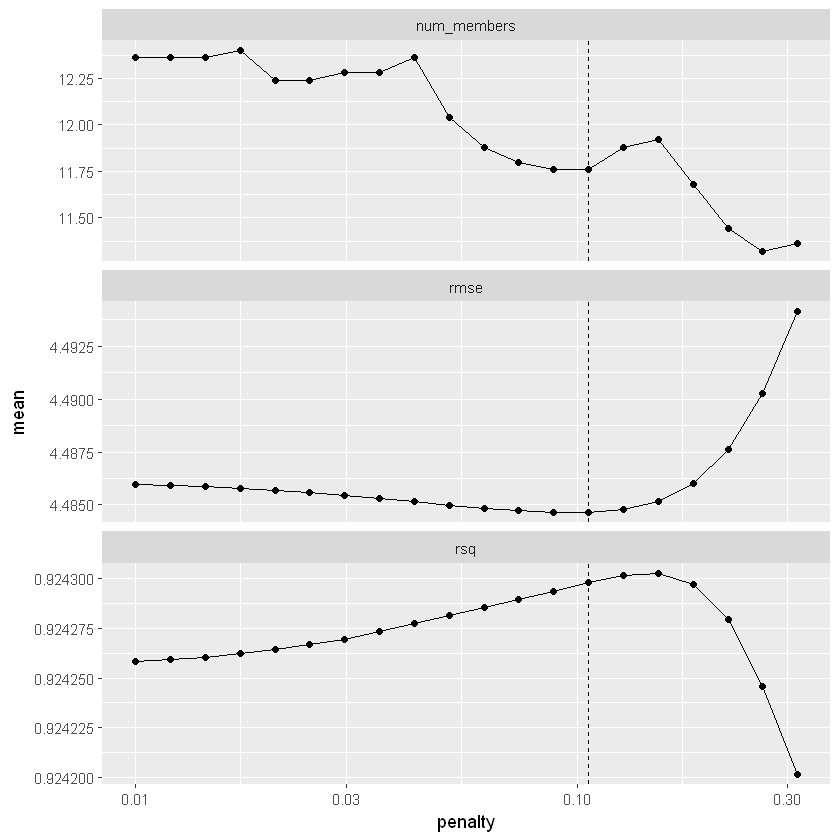

In [9]:
set.seed(2002)
ens <- blend_predictions(concrete_stack, penalty = 10^seq(-2, -0.5, length = 20))
autoplot(ens)

In [10]:
ens

── A stacked ensemble model ─────────────────────────────────────


Out of 250 possible candidate members, the ensemble retained 14.

Penalty: 0.106246783089404.

Mixture: 1.


The 10 highest weighted members are:

Members have not yet been fitted with `fit_members()`.


# A tibble: 10 × 3
   member              type             weight
   <chr>               <chr>             <dbl>
 1 Cubist_1_11         cubist_rules     0.195 
 2 neural_network_1_12 mlp              0.149 
 3 neural_network_1_14 mlp              0.117 
 4 neural_network_1_22 mlp              0.113 
 5 CART_1_19           decision_tree    0.0909
 6 boosting_1_20       boost_tree       0.0903
 7 neural_network_1_19 mlp              0.0745
 8 neural_network_1_18 mlp              0.0508
 9 KNN_1_01            nearest_neighbor 0.0330
10 neural_network_1_01 mlp              0.0308

- 각 모델별 기여도

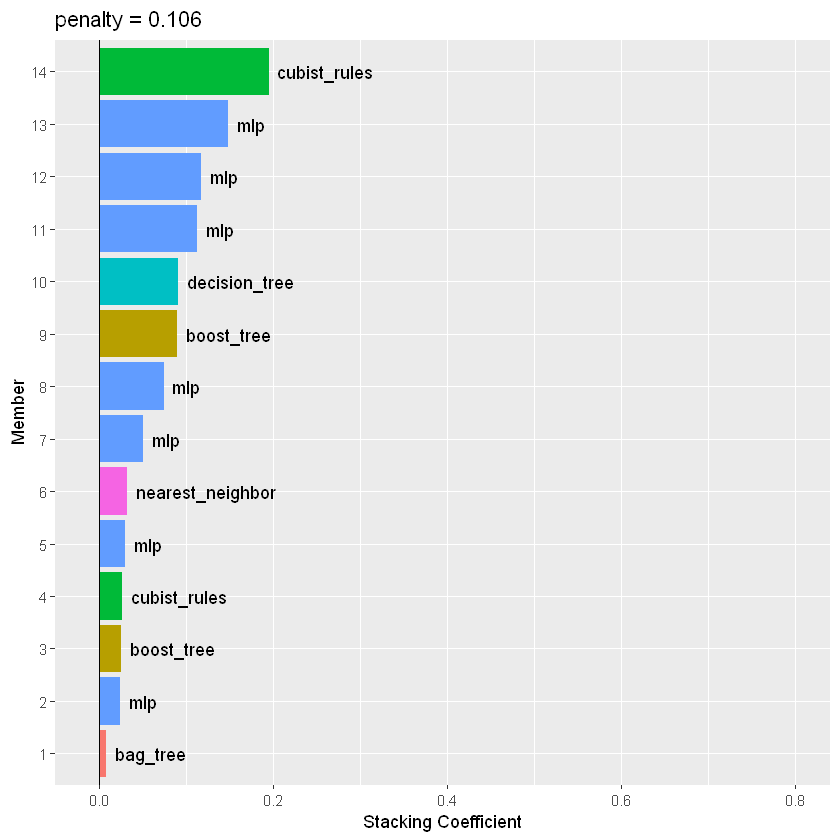

In [11]:
autoplot(ens, "weights") +
    geom_text(aes(x = weight + 0.01, label = model), hjust = 0) + 
    theme(legend.position = "none") +
    lims(x = c(-0.01, 0.8))

- 메타모델과 메타모델을 구성하는 각 모델별 회귀계수

In [12]:
ens$equations$numeric$.pred

-1.1549246456945 + (CART_1_19 * 0.0909440277271217) + (CART_bagged_1_1 * 
    0.00892381722529255) + (boosting_1_20 * 0.090321969779015) + 
    (boosting_1_14 * 0.0258734639126064) + (Cubist_1_04 * 0.0270181739389463) + 
    (Cubist_1_11 * 0.195190303702792) + (KNN_1_01 * 0.033045779927939) + 
    (neural_network_1_22 * 0.113139501859715) + (neural_network_1_18 * 
    0.0507806133706218) + (neural_network_1_14 * 0.117380237232803) + 
    (neural_network_1_01 * 0.0307639547143228) + (neural_network_1_02 * 
    0.0249708175117892) + (neural_network_1_12 * 0.148829105586616) + 
    (neural_network_1_19 * 0.0744675747540244)

In [15]:
res <- stacks:::top_coefs(ens); res

member,type,weight
<chr>,<chr>,<dbl>
Cubist_1_11,cubist_rules,0.19519030
neural_network_1_12,mlp,0.14882911
neural_network_1_14,mlp,0.11738024
neural_network_1_22,mlp,0.11313950
CART_1_19,decision_tree,0.09094403
boosting_1_20,boost_tree,0.09032197
neural_network_1_19,mlp,0.07446757
neural_network_1_18,mlp,0.05078061
KNN_1_01,nearest_neighbor,0.03304578


<br>

## 17.03. 앙상블 모델 적합
- 앙상블 모델에는 7개의 모델이 포함
- 스택킹 모델을 사용하기 위해서 7개의 추가 모델 적합이 필요
    


<br>

#### `fit_members()` : 앙상블 구성 모델별 최적 하이퍼파라미터 적합

In [16]:
ens <- fit_members(ens)

<br>

## 17.04. 테스트 결과
- 하나의 단일 모델보다 더 좋은 성능을 보임을 확인

In [17]:
reg_metrics <- metric_set(rmse, rsq)
ens_test_pred <- predict(ens, concrete_test) %>%
    bind_cols(concrete_test)

- 앙상블 모델 성능

In [18]:
ens_test_pred %>% reg_metrics(compressive_strength, .pred)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.7291975
rsq,standard,0.9445846


- 단일모델 성능

In [22]:
race_results %>% rank_results %>% head(2) %>%
    select(wflow_id, .metric, mean)

wflow_id,.metric,mean
<chr>,<chr>,<dbl>
boosting,rmse,4.335617
boosting,rsq,0.930796
